House price prediction Project

The step:
1. Xác định vấn đề - mục tiêu cần giải quyết 
2. Lựa chọn các tính năng phục vụ cho việc train mô hình
3. Tách tập dữ liệu 

x : feature selection

y : target variable (house price)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm
import sklearn
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("train.csv")
df


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
print(x_train.shape)

(1168, 7)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
# Loại bỏ cột id
df.drop(["Id"], axis=1, inplace=True)



In [ ]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
df_train_num = df.select_dtypes(exclude=["object"])
from sklearn.feature_selection import VarianceThreshold

# độ tương quan cao 
sel = VarianceThreshold(threshold=0.05) # loại bỏ các cột trong đó 95% giá trị không đổi 
sel.fit(df_train_num.iloc[:, :-1])
quasi_constant_features_list = [x for x in df_train_num.iloc[:, :-
                                                             1].columns if x not in df_train_num.iloc[:, :-1].columns[sel.get_support()]]
sel.fit(df_train_num.iloc[:, :-1])
df_train_num.drop(quasi_constant_features_list, axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


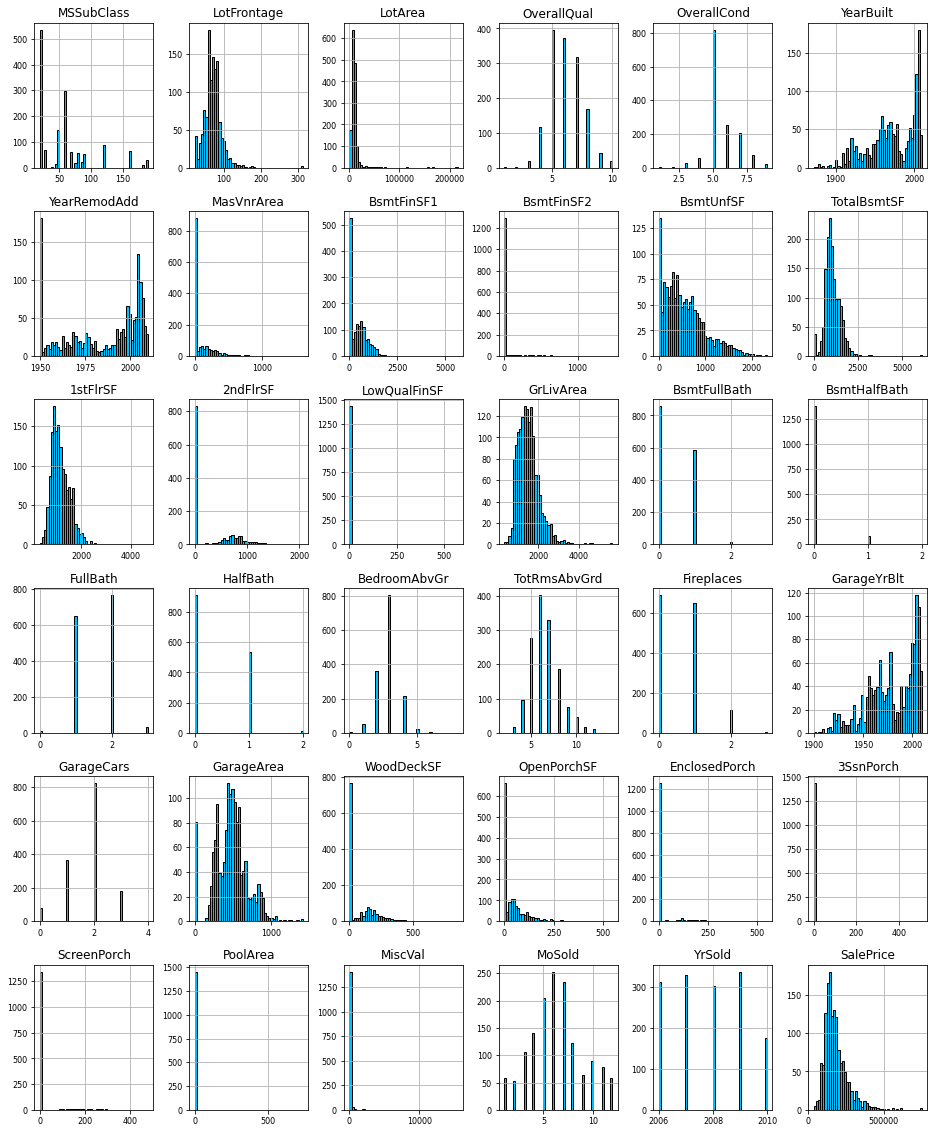

In [ ]:
# trực quan hóa các dữ liệu số 
fig_ = df_train_num.hist(figsize=(16, 20), bins=50, color="deepskyblue",
                         edgecolor="black", xlabelsize=8, ylabelsize=8)

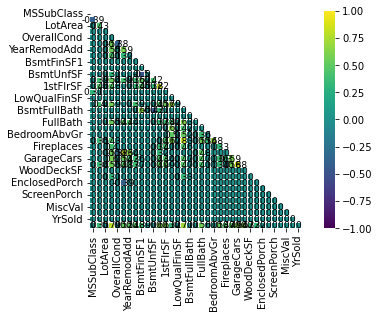

In [ ]:
# Biểu diễn bằng biểu đồ nhiệt 
# Define the heatmap parameters
pd.options.display.float_format = "{:,.2f}".format

# Define correlation matrix
corr_matrix = df_train_num.corr()

# Replace correlation < |0.3| by 0 for a better visibility
corr_matrix[(corr_matrix < 0.3) & (corr_matrix > -0.3)] = 0

# Mask the upper part of the heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Choose the color map
cmap = "viridis"

# plot the heatmap
sns.heatmap(corr_matrix, mask=mask, vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot_kws={"size": 9, "color": "black"}, square=True, cmap=cmap, annot=True)


Lựa chọn các tính năng cho mô hình (feature selection)

2. Lựa chọn tính năng (select feature)

LotArea: Diện tích của cái căn nhà 

Yearbuilt: Năm xây nhà 

1stFlrSF: Diện tích tầng 1 

2stFlrSF: Diện tích tầng 2

FullBath: Số phòng tắm

BedroomAbvGr: Phòng ngủ đạt tiêu chuẩn 

TotRmsAbvGrd: Tổng số phòng đạt tiêu chuẩn







In [ ]:
feature = ["LotArea", "YearBuilt", "1stFlrSF", "2ndFlrSF", "FullBath", "BedroomAbvGr", "TotRmsAbvGrd"]


3. Tách tập dữ liệu

In [ ]:
x = df[feature]

y = df["SalePrice"]
x.head()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
0,8450,2003,856,854,2,3,8
1,9600,1976,1262,0,2,3,6
2,11250,2001,920,866,2,3,6
3,9550,1915,961,756,1,3,7
4,14260,2000,1145,1053,2,4,9


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x,y, train_size = 0.8, test_size = 0.2, random_state=0)

In [ ]:
x_train.shape

(1168, 7)

4. Training machine learning model

In [ ]:
x_train

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
618,11694,2007,1828,0,2,3,9
870,6600,1962,894,0,1,2,5
92,13360,1921,964,0,1,2,5
817,13265,2002,1689,0,2,3,7
302,13704,2001,1541,0,2,3,6
...,...,...,...,...,...,...,...
763,9430,1999,1268,1097,2,3,8
835,9600,1950,1067,0,2,2,4
1216,8930,1978,1318,584,2,4,8
559,3196,2003,1557,0,2,2,7


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=1)

# Fit training data into model
dt_model.fit(x_train,y_train)
# Kiểm tra model
y_preds = dt_model.predict(x_valid.head())
y_preds


array([335000., 140200., 119000., 207500., 112000.])

So sánh cái y preds với y valid

In [ ]:
pd.DataFrame({'y_valid': y_valid.head(), 'y_preds': y_preds})

,y_valid,y_preds
529,200624,"335,000.00"
491,133000,"140,200.00"
459,110000,"119,000.00"
279,192000,"207,500.00"
655,88000,"112,000.00"


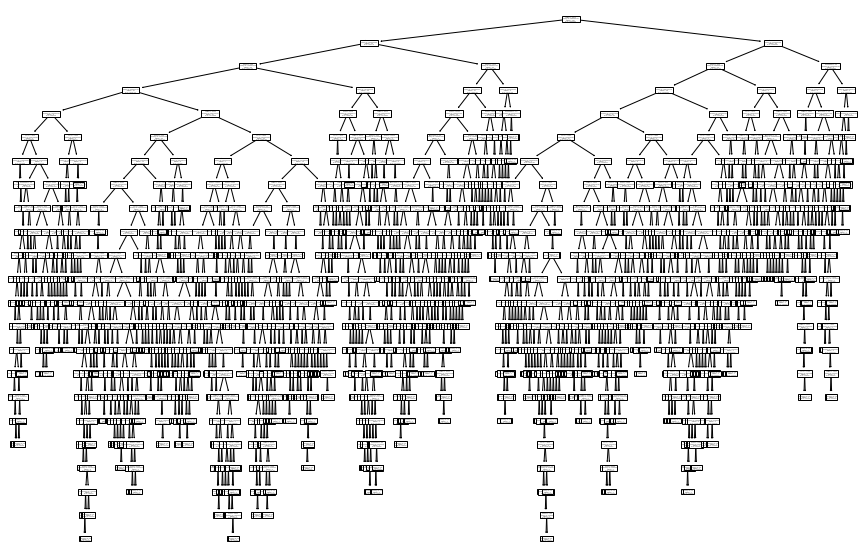

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(dt_model, feature_names=['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd'], class_names=['SalePrice'])

Use Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# Tạo model use Random Forest
rf_model = RandomForestRegressor(random_state=1)
# Đưa dữ liệu vào model 
rf_model.fit(x_train, y_train)

# Đưa dữ liệu vào để model dự đoán

rf_pre = rf_model.predict(x_valid)
x_valid.head()






,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
529,32668,1957,2515,0,3,4,9
491,9490,1941,958,620,1,3,5
459,7015,1950,979,224,1,3,5
279,10005,1977,1156,866,2,4,8
655,1680,1971,525,567,1,3,6


In [ ]:
# evolution
pd.DataFrame({'y_valid': y_valid, 'y_preds': rf_pre})

,y_valid,y_preds
529,200624,"271,690.00"
491,133000,"155,039.00"
459,110000,"122,024.00"
279,192000,"188,915.00"
655,88000,"91,147.00"
...,...,...
326,324000,"275,931.87"
440,555000,"478,954.15"
1387,136000,"176,038.00"
1323,82500,"78,096.00"


In [ ]:
# Đưa một dữ liệu bất kì cho mô hình dự đoán

rf_model.predict([[6969, 2021, 1000, 800, 4, 5, 8]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([206158.4])